<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
def gen_date(series):
    return pd.to_datetime(' '.join([series[1], series[0]]))

In [3]:
def to_float(item):
    if item == ' ':
        return pd.NA
    else:
        return float(item)

In [5]:
file = r'./消光系数data.csv'
data = pd.read_csv(file, encoding='GB18030', header=None)
idx = ['距离/公里', ] + data.iloc[:2, 1:].apply(gen_date).to_list()
data = data.iloc[2:, :]
data.columns = idx
data.set_index('距离/公里', inplace=True)
data = data.apply(lambda ser: ser.apply(to_float))
data = data[~data.isna().all(axis=1)].astype(float)
data

,2022-03-01 09:00:06,2022-03-01 09:01:06,2022-03-01 09:02:06,2022-03-01 09:03:06,2022-03-01 09:04:06,2022-03-01 09:05:06,2022-03-01 09:06:06,2022-03-01 09:07:06,2022-03-01 09:08:06,2022-03-01 09:09:06,...,2022-03-01 12:50:05,2022-03-01 12:51:05,2022-03-01 12:52:05,2022-03-01 12:53:05,2022-03-01 12:54:05,2022-03-01 12:55:05,2022-03-01 12:56:05,2022-03-01 12:57:05,2022-03-01 12:58:05,2022-03-01 12:59:05
距离/公里,,,,,,,,,,,,,,,,,,,,,
0.269813,0.076046,0.028166,0.034255,0.079590,-0.023336,0.069224,0.023617,0.072106,-0.006033,-0.003423,...,0.032529,0.014006,0.006665,0.011055,0.018798,0.025860,0.040341,0.071610,0.185090,0.203212
0.299792,0.054795,0.021534,0.021742,0.025265,0.009972,-0.048692,-0.015042,0.006033,0.000463,-0.082653,...,0.006257,0.014629,0.007810,0.002045,0.013809,0.009083,0.023187,0.058582,0.121473,0.116130
0.329772,0.025678,-0.005847,0.022569,-0.003156,0.042676,-0.028341,-0.017559,-0.028296,-0.079696,-0.076579,...,0.006683,0.000704,-0.005671,-0.005121,0.006523,0.011380,0.017373,0.039900,0.099475,0.094562
0.359751,0.025981,-0.025130,-0.006956,-0.022563,0.008785,-0.087700,-0.052110,-0.084913,-0.056609,-0.052788,...,-0.000923,0.001913,0.000950,-0.000663,0.000616,0.014751,0.018349,0.034261,0.076057,0.087322
0.38973,-0.056751,-0.043321,-0.034793,-0.023594,-0.063084,-0.019408,-0.056212,-0.046254,-0.076300,-0.113448,...,0.001985,-0.001604,-0.001217,0.001177,-0.003198,0.000195,0.010958,0.047559,0.079158,0.082137
0.419709,-0.024328,-0.061282,-0.033316,-0.050599,-0.017593,-0.008417,-0.054926,-0.060611,-0.064560,-0.080236,...,-0.003998,-0.007217,-0.005485,-0.009374,-0.011324,-0.010284,0.002635,0.000270,0.074626,0.069474
0.449689,-0.040544,-0.090096,-0.084238,-0.030803,-0.039993,-0.100764,-0.099832,-0.056124,-0.088892,-0.123287,...,-0.008091,-0.019168,-0.005303,-0.016867,-0.012171,-0.017668,-0.015546,0.001355,0.022951,0.047110
0.479668,-0.050381,-0.080133,-0.074301,-0.106549,-0.087583,-0.050427,-0.089868,-0.089318,-0.111636,-0.084664,...,-0.013732,-0.021432,-0.015684,-0.018485,-0.007698,-0.001839,0.019056,0.029487,0.078547,0.053335
0.509647,-0.070373,-0.100555,-0.103113,-0.120872,-0.124274,-0.114792,-0.129361,-0.109322,-0.124253,-0.157157,...,-0.007310,-0.015656,0.003120,-0.001049,0.006126,0.022003,0.039464,0.086951,0.144044,0.090431


In [20]:
def lidar_pic(data, vmin=0, vmax=1):
    fig, axes = plt.subplots(figsize=(12, 4))
    # cas-pe配色
    colors = ['#024CEB', '#02BBA9', '#65FF00', '#FEFF00', '#FF8800', '#D40608']
    newcmap = LinearSegmentedColormap.from_list('mymap', colors)

    p=axes.imshow(data, vmax=1, vmin=0, origin="lower",
                  aspect='auto', cmap=newcmap)

    xmax, ymax = len(data.columns)-1, len(data.index)-1
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    
    y_idx = [int(i) for i in plt.yticks()[0] if int(i) <= ymax]
    x_idx = [int(i) for i in plt.xticks()[0] if int(i) <= xmax]
    
    plt.yticks(y_idx, ["{:.2f}".format(float(i)) for i in data.index[y_idx]])
    plt.xticks(x_idx, ["{}\n{}".format(*str(i).split(' ')) for i in data.columns[x_idx]])
    
    plt.colorbar(p)
    plt.show()

240
[0, 50, 100, 150, 200]


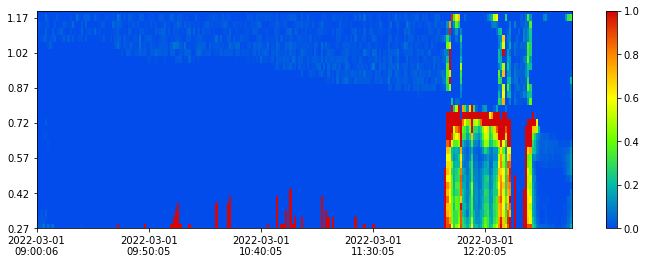

In [19]:
lidar_pic(data)